<a href="https://colab.research.google.com/github/MuradovMaks/Text-recognition-of-Russian-writers/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0%20%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%B8%D1%85%20%D0%BF%D0%B8%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и обработка текста

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2024-11-28 08:42:41--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar.7’

navec_hudlit_v1_12B 100%[===================>]  50.56M  58.4MB/s    in 0.9s    

2024-11-28 08:42:42 (58.4 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar.7’ saved [53012480/53012480]



Загрузка предобученных весов Navec

In [ ]:
!pip install navec

In [ ]:
from navec import Navec

navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

In [ ]:
import keras
data_path = keras.utils.get_file(
    "russian_literature.zip",
    "https://storage.yandexcloud.net/academy.ai/russian_literature.zip"
)

In [ ]:
!unzip -qo '{data_path}' -d ./dataset

error:  cannot create ./dataset/poems/Blok/╨б╤В╨╕╤Е╨╛╤В╨▓╨╛╤А╨╡╨╜╨╕╤П 1897-1903 ╨│╨│, ╨╜╨╡ ╨▓╨╛╤И╨╡╨┤╤И╨╕╨╡ ╨▓ ╨╛╤Б╨╜╨╛╨▓╨╜╨╛╨╡ ╤Б╨╛╨▒╤А╨░╨╜╨╕╨╡.txt
        File name too long
error:  cannot create ./dataset/prose/Gogol/╨Я╨╛╨▓╨╡╤Б╤В╤М ╨╛ ╤В╨╛╨╝, ╨║╨░╨║ ╨┐╨╛╤Б╤Б╨╛╤А╨╕╨╗╤Б╤П ╨Ш╨▓╨░╨╜ ╨Ш╨▓╨░╨╜╨╛╨▓╨╕╤З ╤Б ╨Ш╨▓╨░╨╜╨╛╨╝ ╨Э╨╕╨║╨╕╤Д╨╛╤А╨╛╨▓╨╕╤З╨╡╨╝.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Ф╨╛╨║╨╗╨░╨┤, ╨┐╤А╨╕╨│╨╛╤В╨╛╨▓╨╗╨╡╨╜╨╜╤Л╨╣ ╨┤╨╗╤П ╨║╨╛╨╜╨│╤А╨╡╤Б╤Б╨░ ╨╛ ╨╝╨╕╤А╨╡ ╨▓ ╨б╤В╨╛╨║╨│╨╛╨╗╤М╨╝╨╡.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Я╨╛╤З╨╡╨╝╤Г ╤Е╤А╨╕╤Б╤В╨╕╨░╨╜╤Б╨║╨╕╨╡ ╨╜╨░╤А╨╛╨┤╤Л ╨▓╨╛╨╛╨▒╤Й╨╡ ╨╕ ╨▓ ╨╛╤Б╨╛╨▒╨╡╨╜╨╜╨╛╤Б╤В╨╕ ╤А╤Г╤Б╤Б╨║╨╕╨╣ ╨╜╨░╤Е╨╛╨┤╤П╤В╤Б╤П ╤В╨╡╨┐╨╡╤А╤М ╨▓ ╨▒╨╡╨┤╤Б╤В╨▓╨╡╨╜╨╜╨╛╨╝ ╨┐╨╛╨╗╨╛╨╢╨╡╨╜╨╕╨╕.txt
        File name too long


In [ ]:
CLASS_LIST=["Dostoevsky", "Tolstoy", "Turgenev", "Chekhov", "Gogol"]


In [ ]:
import glob

#Соберем в словарь весь датасет

all_texts = {}

for author in CLASS_LIST:
  all_texts[author] = ' '
  for path in glob.glob('./dataset/poems/{}/*.txt'.format(author)) + glob.glob('./dataset/prose/{}/*.txt'.format(author)):
    with open(path,'r',errors='ignore') as file:
      text=file.read()

    all_texts[author] += " " + text.replace('\n',' ')




In [ ]:
#Токенизируем
from tensorflow.keras.preprocessing.text import Tokenizer

emb_dim = 300 # размерность векторов эмбединга (300d в имени эмбединга)
NUM_WORDS = 10000 #Признаки

tokenizer = Tokenizer(num_words=NUM_WORDS,lower=True,filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',char_level=False)
tokenizer.fit_on_texts(all_texts.values())

In [ ]:
#Преобразуем текст в последовательность

seq_train = tokenizer.texts_to_sequences(all_texts.values())

In [ ]:
#Сбалансируем наш датасет
seq_train_balance = [seq_train[cls][:40000] for cls in range(len(CLASS_LIST))]
total = sum(len(i) for i in seq_train_balance)
print(f'Датасет состоит из {total} слов')

Датасет состоит из 200000 слов


In [ ]:
import numpy as np

print('Общая выборка по словам')
mean_list = np.array([])

for author in CLASS_LIST:
  cls = CLASS_LIST.index(author)
  print(f'{author} - {len(seq_train_balance[cls])} слов {len(seq_train_balance[cls]) / total *100 :.2f}%')
  mean_list = np.append(mean_list,len(seq_train_balance[cls]))

print('Cреднее значения слов :',np.round(mean_list.mean()))
print('Медианное значение слов :',np.median(mean_list))

Общая выборка по словам
Dostoevsky - 40000 слов 20.00%
Tolstoy - 40000 слов 20.00%
Turgenev - 40000 слов 20.00%
Chekhov - 40000 слов 20.00%
Gogol - 40000 слов 20.00%
Cреднее значения слов : 40000.0
Медианное значение слов : 40000.0


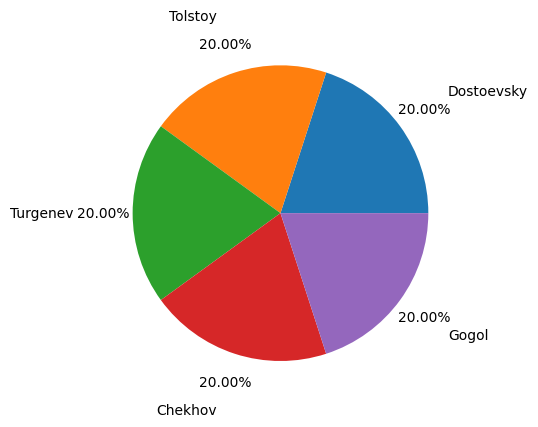

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance],labels=CLASS_LIST,pctdistance=1.2,labeldistance=1.4,                    autopct='%1.2f%%')

plt.show()

In [ ]:
#Нарежем примеры методом скользящего окна
WIN_SIZE = 1000
WIN_STEP = 100

def seq_split(seq,win_size,win_step):
  # Делим строку на отрезки с помощью генератора цикла
  return [seq[i:i + win_size] for i in range(0,len(seq) - win_size + 1, win_step)]

def seq_vectorize(seq_list,win_size,win_step,test_split,val_split,class_list):
  x_train,y_train,x_val,y_val,x_test,y_test = [],[],[],[],[],[]

  for item in class_list:
    cls = class_list.index(item)
    total_size = len(seq_list[cls])
    test_val_size = int((val_split + test_split) * total_size)
    test_size = val_size = int(test_val_size / 2)
    total_size = total_size - test_val_size

    vectors_train = seq_split(seq_list[cls][:total_size], win_size, win_step)
    vectors_val = seq_split(seq_list[cls][total_size:total_size + val_size], win_size, win_step)
    vectors_test = seq_split(seq_list[cls][total_size + val_size:], win_size, win_step)

    x_train += vectors_train
    x_val += vectors_val
    x_test +=vectors_test


    y_train += [keras.utils.to_categorical(cls,num_classes=len(class_list))] * len(vectors_train)
    y_val += [keras.utils.to_categorical(cls,num_classes=len(class_list))] * len(vectors_val)
    y_test += [keras.utils.to_categorical(cls,num_classes=len(class_list))] * len(vectors_test)


  return np.array(x_train),np.array(y_train),np.array(x_val),np.array(y_val),np.array(x_test),np.array(y_test)

In [ ]:
x_train,y_train,x_val,y_val,x_test,y_test = seq_vectorize(seq_train_balance,WIN_SIZE,WIN_STEP,0.1,0.1,class_list=CLASS_LIST)

In [ ]:
print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных (меток) для обучающей выборки: {y_train.shape}')

Форма входных данных для обучающей выборки: (1555, 1000)
Форма выходных данных (меток) для обучающей выборки: (1555, 5)


In [ ]:
print(f'Форма входных данных для валидационной выборки: {x_val.shape}')
print(f'Форма выходных данных (меток) для валидационной выборки: {y_val.shape}')

Форма входных данных для валидационной выборки: (155, 1000)
Форма выходных данных (меток) для валидационной выборки: (155, 5)


In [ ]:
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_test.shape}')

Форма входных данных для тестовой выборки: (155, 1000)
Форма выходных данных (меток) для тестовой выборки: (155, 5)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок

def show_plot(history):
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
  fig.suptitle('График процесса обучения')
  ax1.plot(history.history['accuracy'],label='График точности на обучающей выборке')
  ax1.plot(history.history['val_accuracy'],label='График точности на валидационной выборке')
  ax1.xaxis.get_major_locator().set_params(integer=True)
  ax1.set_xlabel('Эпохи')
  ax1.set_ylabel('Значения точности')
  ax1.legend()

  ax2.plot(history.history['loss'],label='График потерь на обучающей выборке')
  ax2.plot(history.history['val_loss'],label='График потерь на валидационной выборке')
  ax2.xaxis.get_major_locator().set_params(integer=True)
  ax2.set_xlabel('Эпохи')
  ax2.set_ylabel('Значения потерь')
  ax2.legend()

  plt.show()



def confusional_matrix(y_true,y_pred,class_lables):
  cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
  cm = np.around(cm, 3)
  fig,ax = plt.subplots(figsize=(10,10))
  ax.set_title('Матрица ошибок ')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_lables)
  disp.plot(ax=ax)
  plt.gca().images[-1].colorbar.remove()
  plt.xlabel('Предсказанные классы', fontsize=16)
  plt.ylabel('Верные классы', fontsize=16)
  fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
  plt.show()


  print('\nСредняя точность распознования : {:3.0f}%'.format(100. * cm.diagonal().mean()))

# Загрузка весов и обучение модели

In [ ]:
#Загрузка весов

word_index = tokenizer.word_index
embedding_index = navec

embedding_matrix = np.zeros((NUM_WORDS,emb_dim))

for word,i in word_index.items():
  if i < NUM_WORDS:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SpatialDropout1D, BatchNormalization, Dropout

model = Sequential()
model.add(Embedding(NUM_WORDS, emb_dim, input_length=(WIN_SIZE,), weights=embedding_matrix))
model.add(BatchNormalization())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(20, activation="relu"))
model.add(Flatten())
model.add(Dense(len(CLASS_LIST), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=150,batch_size=256,validation_data=(x_val,y_val))


Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 457ms/step - accuracy: 0.1781 - loss: 4.3114 - val_accuracy: 0.2258 - val_loss: 2.0175
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2225 - loss: 3.7476 - val_accuracy: 0.2000 - val_loss: 1.6742
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2537 - loss: 2.5310 - val_accuracy: 0.3032 - val_loss: 1.5847
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2614 - loss: 1.8887 - val_accuracy: 0.2645 - val_loss: 1.5641
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3480 - loss: 1.5319 - val_accuracy: 0.3548 - val_loss: 1.5256
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4080 - loss: 1.4027 - val_accuracy: 0.3806 - val_loss: 1.4947
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4893 - loss: 1.2571 - val_accuracy: 0.3742 - val_loss: 1.4554
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5494 - loss: 1.1233 - val_accuracy: 0.4452 - val_loss

In [ ]:
model.save_weights(filepath='./pre_trained_2_weights.weights.h5')

In [ ]:
model.load_weights('./pre_trained_2_weights.weights.h5')

# Визуализация

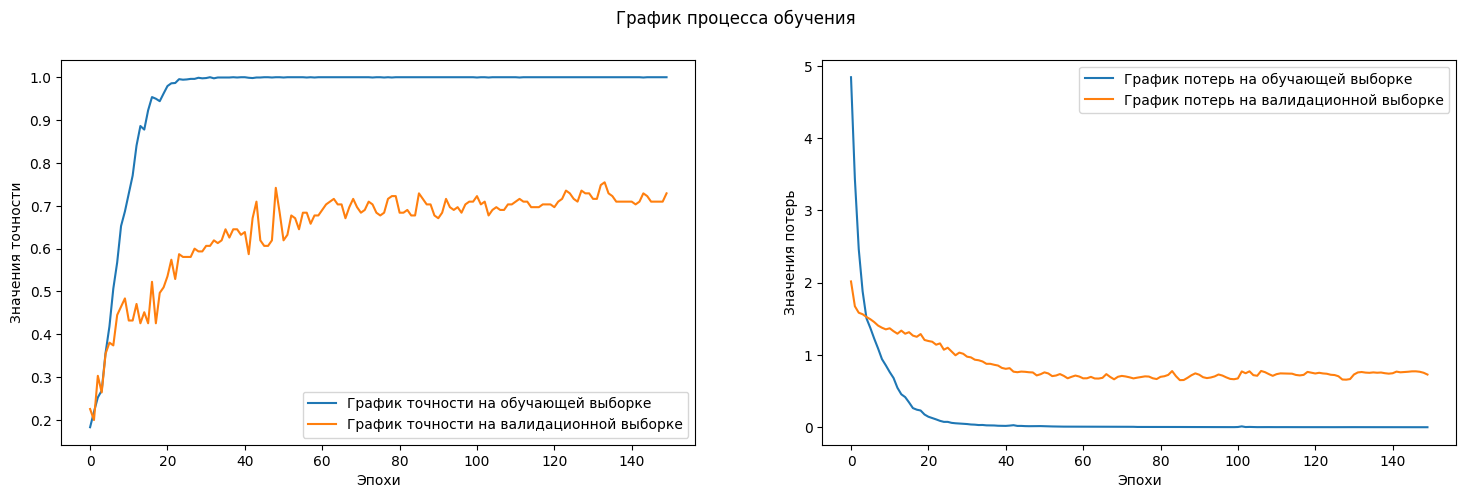

In [ ]:
show_plot(history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


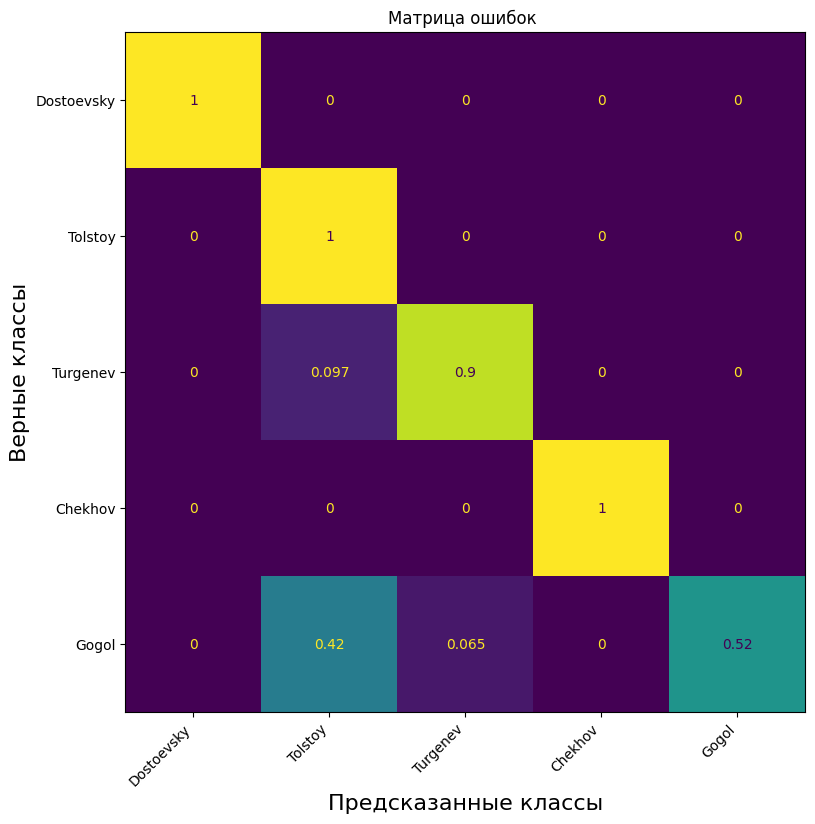


Средняя точность распознования :  88%


In [ ]:
y_pred = model.predict(x_test)
confusional_matrix(y_test,y_pred,CLASS_LIST)